## 4-1 確率と統計を学ぶ準備

In [2]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第3位まで表示
%precision 3

# ランダムシードの固定
np.random.seed(0)

In [3]:
dice_data = np.array([1, 2, 3, 4, 5, 6])

print("１つだけランダムに抽出:{}".format(np.random.choice(dice_data, 1)))

１つだけランダムに抽出:[5]


In [4]:
calc_steps = 1000

dice_rolls = np.random.choice(dice_data, calc_steps)

for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print("{}が出る確率:{}".format(i, p))

1が出る確率:0.171
2が出る確率:0.158
3が出る確率:0.157
4が出る確率:0.183
5が出る確率:0.16
6が出る確率:0.171


一様分布

[0.164 0.166 0.17  0.178 0.159 0.163]


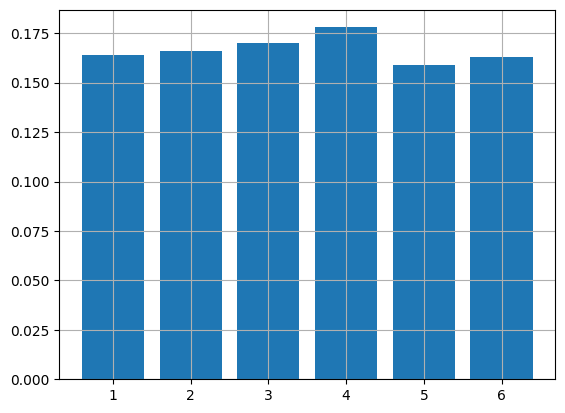

In [5]:
calc_steps = 1000

dice_rolls = np.random.choice(dice_data,calc_steps)

prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls==i]) / calc_steps)

plt.bar(dice_data, prob_data)
plt.grid(True)
print(prob_data)

ベルヌーイ分布

In [6]:
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

# uniqueで一意な値を抽出
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print("{}が出る確率:{}".format(i, p))
    prob_be_data = np.append(prob_be_data, p)

print(prob_be_data)

0が出る確率:0.625
1が出る確率:0.375
[0.625 0.375]


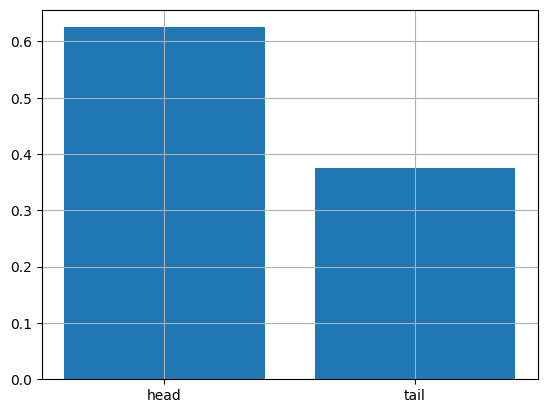

In [7]:
plt.bar([0, 1], prob_be_data, align='center')   
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

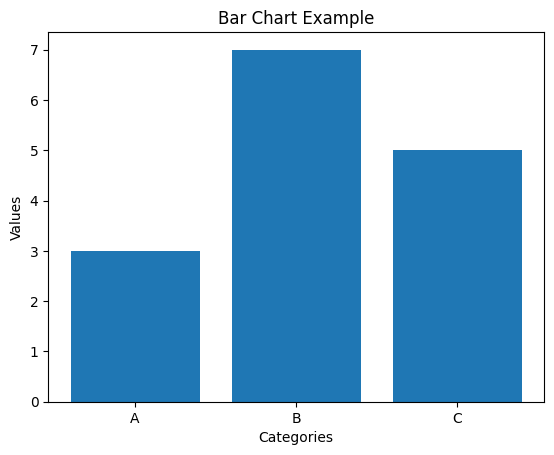

In [8]:
categories = ['A', 'B', 'C']
values = [3, 7, 5]

# 棒グラフの作成
plt.bar(categories, values)

# タイトルとラベルの設定
plt.title('Bar Chart Example')
plt.xlabel('Categories')
plt.ylabel('Values')

# グラフを表示
plt.show()

二項分布

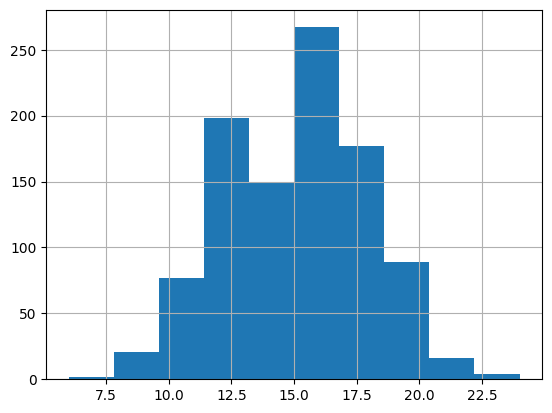

In [9]:
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

ポアソン分布

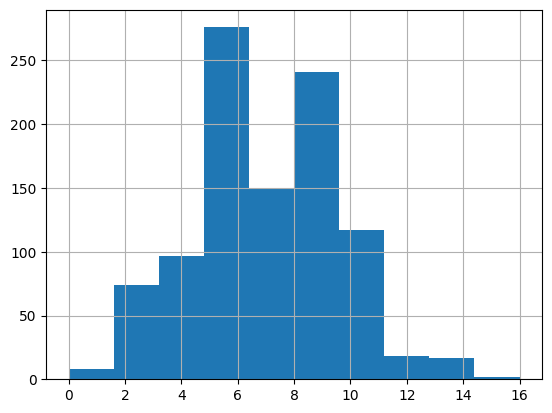

In [10]:
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

正規分布と対数正規分布

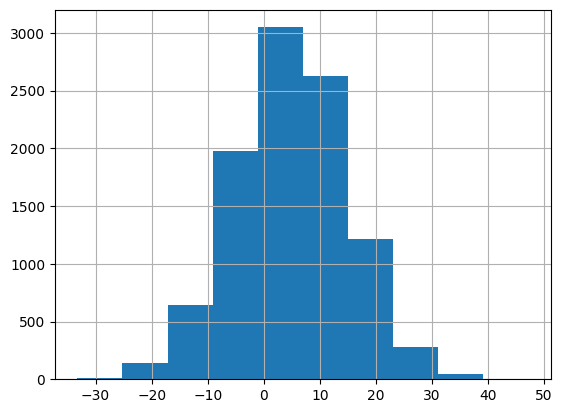

In [11]:
# 正規分布
# np.random.normal(平均, 標準偏差, サンプル数)
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

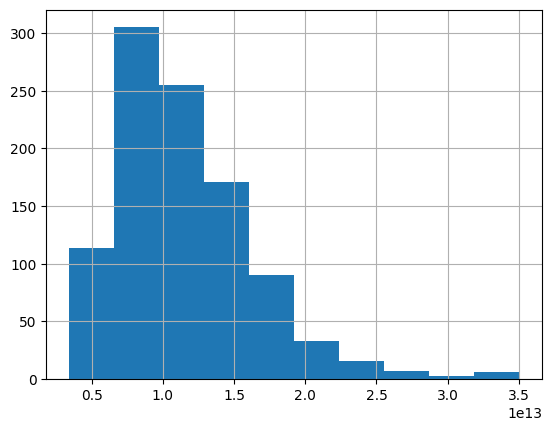

In [12]:
# 対数正規分布
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

# 4-3-3 カーネル密度関数

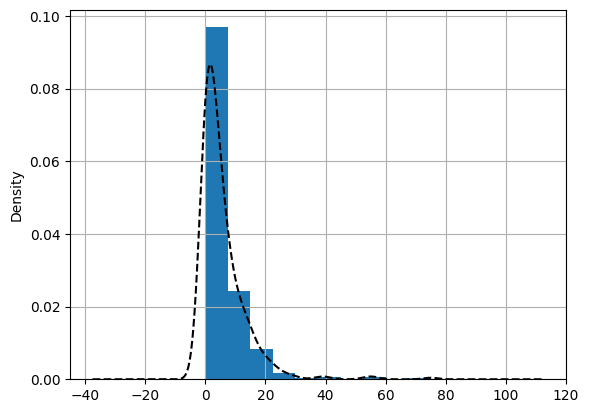

In [22]:
import requests
import zipfile
from io import StringIO
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# データの読み込み
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# カーネル密度
student_data_math.absences.plot(kind='kde', style='k--')

# 単純なヒストグラム，density=Trueにすると確率で表示
student_data_math.absences.hist(density=True)
# student_data_math.absences.hist()
plt.grid(True)

練習問題

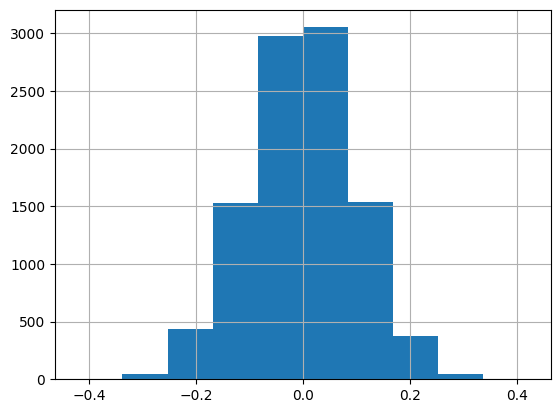

In [27]:
# 4-4
N = 10000

# normal_sample_data = np.random.normal(0, 1, N)
normal_sample_data = [np.random.normal(0, 1, 100).mean() for _ in range(N)]

plt.hist(normal_sample_data)
plt.grid(True)

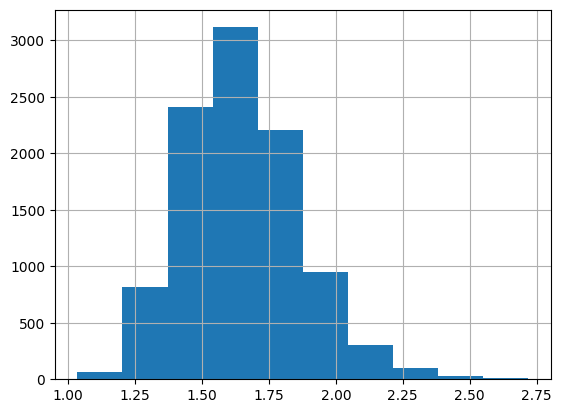

In [30]:
N = 10000

lognormal_sample_data = [np.random.lognormal(0, 1, 100).mean() for _ in range(N)]
plt.hist(lognormal_sample_data)
plt.grid(True)

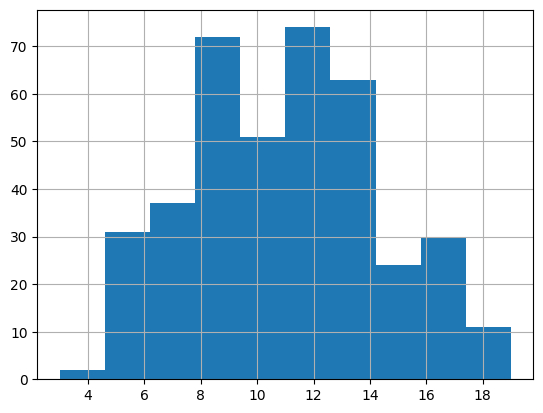

In [31]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')

plt.hist(student_data_math.G1)
plt.grid(True)

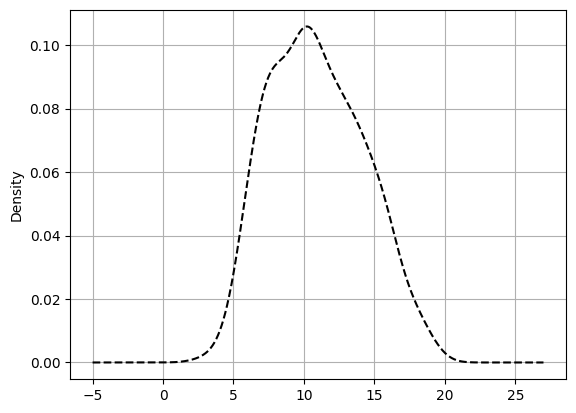

In [32]:
student_data_math.G1.plot(kind='kde', style='k--')
plt.grid(True)